In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/top-anime-ranked/Anime_rank.csv


In [2]:
raw_data = pd.read_csv('/kaggle/input/top-anime-ranked/Anime_rank.csv')
raw_data.head(10)

,UID,Title,Rank,Stream type,Episodes,Start date,End date,Members,Score
0,1,Sousou no Frieren,1,TV,28.0,Sep 2023,Mar 2024,"800,615",9.35
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,Apr 2009,Jul 2010,"3,373,923",9.09
2,3,Steins;Gate,3,TV,24.0,Apr 2011,Sep 2011,"2,584,616",9.07
3,4,Gintama°,4,TV,51.0,Apr 2015,Mar 2016,"636,631",9.06
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,Apr 2019,Jul 2019,"2,305,044",9.05
5,6,Gintama: The Final,6,Movie,1.0,Jan 2021,Jan 2021,"153,317",9.04
6,7,Gintama',7,TV,51.0,Apr 2011,Mar 2012,"561,485",9.03
7,8,Hunter x Hunter (2011),8,TV,148.0,Oct 2011,Sep 2014,"2,863,958",9.03
8,9,Ginga Eiyuu Densetsu,9,OVA,110.0,Jan 1988,Mar 1997,"325,595",9.02
9,10,Gintama': Enchousen,10,TV,13.0,Oct 2012,Mar 2013,"328,147",9.02


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8650 entries, 0 to 8649
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UID          8650 non-null   int64  
 1   Title        8650 non-null   object 
 2   Rank         8650 non-null   int64  
 3   Stream type  8650 non-null   object 
 4   Episodes     8608 non-null   float64
 5   Start date   8648 non-null   object 
 6   End date     8551 non-null   object 
 7   Members      8650 non-null   object 
 8   Score        8650 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 608.3+ KB


In [4]:
raw_data.isnull().sum()

UID             0
Title           0
Rank            0
Stream type     0
Episodes       42
Start date      2
End date       99
Members         0
Score           0
dtype: int64

In [5]:
data = raw_data.dropna(axis = 0)
data = data.drop_duplicates()
data.isnull().sum()

UID            0
Title          0
Rank           0
Stream type    0
Episodes       0
Start date     0
End date       0
Members        0
Score          0
dtype: int64

In [6]:
data.columns = [x.lower() for x in data.columns]
data.columns = data.columns.str.replace(' ', '_')
data.head()

,uid,title,rank,stream_type,episodes,start_date,end_date,members,score
0,1,Sousou no Frieren,1,TV,28.0,Sep 2023,Mar 2024,"800,615",9.35
1,2,Fullmetal Alchemist: Brotherhood,2,TV,64.0,Apr 2009,Jul 2010,"3,373,923",9.09
2,3,Steins;Gate,3,TV,24.0,Apr 2011,Sep 2011,"2,584,616",9.07
3,4,Gintama°,4,TV,51.0,Apr 2015,Mar 2016,"636,631",9.06
4,5,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,Apr 2019,Jul 2019,"2,305,044",9.05


In [7]:
data.describe(include='all')

,uid,title,rank,stream_type,episodes,start_date,end_date,members,score
count,8549.000000,8549,8549.000000,8549,8549.000000,8549,8549,8549,8549.000000
unique,NaN,8545,NaN,6,NaN,650,641,7948,NaN
top,NaN,Shen Lan Qi Yu Wushuang Zhu: Tianmo Pian,NaN,TV,NaN,Apr 2018,Mar 2023,"1,562",NaN
freq,NaN,2,NaN,3771,NaN,74,79,4,NaN
mean,4335.175459,NaN,4335.175459,NaN,14.979881,NaN,NaN,NaN,7.036729
std,2497.169233,NaN,2497.169233,NaN,33.229750,NaN,NaN,NaN,0.592956
min,1.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,6.150000
25%,2168.000000,NaN,2168.000000,NaN,1.000000,NaN,NaN,NaN,6.550000
50%,4343.000000,NaN,4343.000000,NaN,11.000000,NaN,NaN,NaN,6.970000
75%,6499.000000,NaN,6499.000000,NaN,13.000000,NaN,NaN,NaN,7.420000


In [8]:
import statistics as stats
print("Mean of Score is:", stats.mean(data['score']))
print("Median of Score is:", stats.median(data['score']))
print("Standard deviation of Score is:", stats.stdev(data['score']))
print("Variance of Score is:", stats.variance(data['score']))
print("Mode of Score is:", stats.mode(data['score']))


Mean of Score is: 7.036729442040005
Median of Score is: 6.97
Standard deviation of Score is: 0.5929564099249304
Variance of Score is: 0.35159730407106204
Mode of Score is: 6.42


**Descriptive statistics of Score**
* Mean: **7.04**
* Median: **6.97**
* Standard deviation: **0.6**
* Mode: **6.42**


In [9]:
data['start_date'].unique()

array(['Sep 2023 ', 'Apr 2009 ', 'Apr 2011 ', 'Apr 2015 ', 'Apr 2019 ',
       'Jan 2021 ', 'Oct 2011 ', 'Jan 1988 ', 'Oct 2012 ', 'Oct 2022 ',
       'Apr 2022 ', 'Jan 2017 ', 'Apr 2021 ', 'Sep 2016 ', 'Oct 2008 ',
       'Apr 2006 ', 'Oct 2017 ', 'Apr 2008 ', 'Jul 2013 ', 'Oct 2023 ',
       'Mar 2023 ', 'Jul 2018 ', 'Apr 2004 ', 'Aug 2017 ', 'Sep 2020 ',
       'Aug 2016 ', 'Jan 2024 ', 'Jul 2023 ', 'Apr 2020 ', 'Jan 2023 ',
       'Jan 2018 ', 'Jan 2019 ', 'Oct 2016 ', 'Dec 2020 ', 'Dec 2022 ',
       'Jul 2001 ', 'Oct 2000 ', 'Jan 2022 ', 'Apr 1998 ', 'Apr 2024 ',
       'Jul 2019 ', 'Dec 2021 ', 'Oct 2014 ', 'Oct 1980 ', 'Feb 1999 ',
       'Oct 2021 ', 'Oct 2006 ', 'Jun 1999 ', 'Aug 2021 ', 'Apr 2014 ',
       'Feb 2024 ', 'Jan 2009 ', 'Aug 2020 ', 'Nov 2004 ', 'Jul 1997 ',
       'Oct 2005 ', 'Jul 2017 ', 'Jan 2012 ', 'Apr 2023 ', 'Jul 2022 ',
       'Apr 2007 ', 'Oct 2015 ', 'Jan 2020 ', 'Apr 2017 ', 'Sep 2022 ',
       'Oct 2013 ', 'Feb 2010 ', 'Oct 2020 ', 'Oct 1997 ', 'May 

In [10]:
data['end_date'].unique()

array([' Mar 2024', ' Jul 2010', ' Sep 2011', ' Mar 2016', ' Jul 2019',
       ' Jan 2021', ' Mar 2012', ' Sep 2014', ' Mar 1997', ' Mar 2013',
       ' Dec 2022', ' Jun 2022', ' Mar 2017', ' Jun 2021', ' Sep 2016',
       ' Mar 2009', ' Mar 2010', ' Mar 2018', ' Sep 2008', ' Jul 2013',
       ' Nov 2023', ' Oct 2018', ' Sep 2005', ' Aug 2017', ' Sep 2020',
       ' Aug 2016', ' Dec 2023', ' Oct 2021', ' Jun 2023', ' Apr 2019',
       ' Jan 2017', ' Dec 2016', ' Mar 2021', ' Jul 2001', ' Mar 2002',
       ' Apr 2022', ' Dec 2013', ' Apr 1999', ' Jun 2024', ' Dec 2019',
       ' Feb 2022', ' Oct 2022', ' Jul 2021', ' Dec 2014', ' Aug 1981',
       ' Sep 1999', ' Mar 2022', ' Jul 2007', ' Sep 2023', ' Sep 2000',
       ' Jun 2014', ' Jan 2024', ' Apr 2018', ' Feb 2024', ' Jul 2009',
       ' Aug 2020', ' Nov 2004', ' Jul 1997', ' Jun 2006', ' Dec 2021',
       ' Sep 2017', ' Mar 2015', ' Jun 2020', ' Sep 2022', ' Sep 2007',
       ' Jun 2007', ' Jan 2020', ' Jun 2017', ' Mar 2014', ' Feb

In [11]:
# Strip whitespace from columns
data['start_date'] = data['start_date'].str.strip()
data['end_date'] = data['end_date'].str.strip()
data['end_date'].unique()

array(['Mar 2024', 'Jul 2010', 'Sep 2011', 'Mar 2016', 'Jul 2019',
       'Jan 2021', 'Mar 2012', 'Sep 2014', 'Mar 1997', 'Mar 2013',
       'Dec 2022', 'Jun 2022', 'Mar 2017', 'Jun 2021', 'Sep 2016',
       'Mar 2009', 'Mar 2010', 'Mar 2018', 'Sep 2008', 'Jul 2013',
       'Nov 2023', 'Oct 2018', 'Sep 2005', 'Aug 2017', 'Sep 2020',
       'Aug 2016', 'Dec 2023', 'Oct 2021', 'Jun 2023', 'Apr 2019',
       'Jan 2017', 'Dec 2016', 'Mar 2021', 'Jul 2001', 'Mar 2002',
       'Apr 2022', 'Dec 2013', 'Apr 1999', 'Jun 2024', 'Dec 2019',
       'Feb 2022', 'Oct 2022', 'Jul 2021', 'Dec 2014', 'Aug 1981',
       'Sep 1999', 'Mar 2022', 'Jul 2007', 'Sep 2023', 'Sep 2000',
       'Jun 2014', 'Jan 2024', 'Apr 2018', 'Feb 2024', 'Jul 2009',
       'Aug 2020', 'Nov 2004', 'Jul 1997', 'Jun 2006', 'Dec 2021',
       'Sep 2017', 'Mar 2015', 'Jun 2020', 'Sep 2022', 'Sep 2007',
       'Jun 2007', 'Jan 2020', 'Jun 2017', 'Mar 2014', 'Feb 2010',
       'Apr 1998', 'May 2015', 'Jun 2019', 'Apr 2009', 'Oct 20

In [12]:
data['end_date'] = data['end_date'].str.strip()
data['end_date'].unique()

array(['Mar 2024', 'Jul 2010', 'Sep 2011', 'Mar 2016', 'Jul 2019',
       'Jan 2021', 'Mar 2012', 'Sep 2014', 'Mar 1997', 'Mar 2013',
       'Dec 2022', 'Jun 2022', 'Mar 2017', 'Jun 2021', 'Sep 2016',
       'Mar 2009', 'Mar 2010', 'Mar 2018', 'Sep 2008', 'Jul 2013',
       'Nov 2023', 'Oct 2018', 'Sep 2005', 'Aug 2017', 'Sep 2020',
       'Aug 2016', 'Dec 2023', 'Oct 2021', 'Jun 2023', 'Apr 2019',
       'Jan 2017', 'Dec 2016', 'Mar 2021', 'Jul 2001', 'Mar 2002',
       'Apr 2022', 'Dec 2013', 'Apr 1999', 'Jun 2024', 'Dec 2019',
       'Feb 2022', 'Oct 2022', 'Jul 2021', 'Dec 2014', 'Aug 1981',
       'Sep 1999', 'Mar 2022', 'Jul 2007', 'Sep 2023', 'Sep 2000',
       'Jun 2014', 'Jan 2024', 'Apr 2018', 'Feb 2024', 'Jul 2009',
       'Aug 2020', 'Nov 2004', 'Jul 1997', 'Jun 2006', 'Dec 2021',
       'Sep 2017', 'Mar 2015', 'Jun 2020', 'Sep 2022', 'Sep 2007',
       'Jun 2007', 'Jan 2020', 'Jun 2017', 'Mar 2014', 'Feb 2010',
       'Apr 1998', 'May 2015', 'Jun 2019', 'Apr 2009', 'Oct 20

In [13]:
# Creating new columns from start_date and end_date
data[['S_month','S_year']] = data['start_date'].str.split(' ', n=1, expand=True)
data[['E_month','E_year']] = data['end_date'].str.split(' ', n=1, expand=True)
# Droping 'uid' columns as it is redundent.
data = data.drop('uid', axis=1)
# Let's assingn category to the anime list based on Measures of Central Tendency of 'Score' 
data['R_category'] = np.where((data.score>=8.87),"Rank A",
                             np.where((data.score<=8.86) & (data.score>=8.26),"Rank B",
                                np.where((data.score<=8.25) & (data.score>=7.65), "Rank C",
                                    np.where((data.score<=7.64) & (data.score>=7.04),"Rank D",
                                        np.where((data.score<=7.03) & (data.score>=6.44),"Rank E",
                                            np.where((data.score<=6.43),"Rank F","No Ranks"))))))
data.head()

,title,rank,stream_type,episodes,start_date,end_date,members,score,S_month,S_year,E_month,E_year,R_category
0,Sousou no Frieren,1,TV,28.0,Sep 2023,Mar 2024,"800,615",9.35,Sep,2023,Mar,2024,Rank A
1,Fullmetal Alchemist: Brotherhood,2,TV,64.0,Apr 2009,Jul 2010,"3,373,923",9.09,Apr,2009,Jul,2010,Rank A
2,Steins;Gate,3,TV,24.0,Apr 2011,Sep 2011,"2,584,616",9.07,Apr,2011,Sep,2011,Rank A
3,Gintama°,4,TV,51.0,Apr 2015,Mar 2016,"636,631",9.06,Apr,2015,Mar,2016,Rank A
4,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,Apr 2019,Jul 2019,"2,305,044",9.05,Apr,2019,Jul,2019,Rank A


In [14]:
data.S_month.value_counts()

S_month
Apr     1512
Oct     1410
Jul     1138
Jan      978
Mar      642
Dec      569
Sep      442
Aug      426
Feb      367
Jun      353
Nov      351
May      278
2005       6
2008       6
2003       5
2004       5
2002       5
2006       4
2012       4
1993       4
2001       3
1988       3
1997       3
1986       3
2017       2
1981       2
1961       2
2009       2
2015       2
2013       2
1998       1
1991       1
2010       1
1987       1
1978       1
1969       1
2016       1
1996       1
1995       1
1980       1
2022       1
2021       1
1994       1
1964       1
2000       1
2007       1
2019       1
1976       1
2018       1
1982       1
Name: count, dtype: int64

In [15]:
df1 = data.copy()
mask = df1['start_date']<'2024'
df1.loc[mask, 'start_date'] = 'Jan ' + df1['start_date'].astype(str)

In [16]:
df1.loc[df1['S_month']=='2008']

,title,rank,stream_type,episodes,start_date,end_date,members,score,S_month,S_year,E_month,E_year,R_category
3265,Meitantei Conan OVA 08: Joshikousei Tantei Suz...,3266,OVA,1.0,Jan 2008,2008,"13,208",7.19,2008,None,2008,None,Rank D
6684,Harukanaru Toki no Naka de 3: Kurenai no Tsuki...,6685,Special,1.0,Jan 2008,2008,"1,526",6.52,2008,None,2008,None,Rank E
8256,Domo TV,8257,TV,26.0,Jan 2008,2008,"1,648",6.23,2008,None,2008,None,Rank F
8276,Zoku Attacker You! Kin Medal e no Michi,8277,TV,52.0,Jan 2008,2008,"1,300",6.23,2008,None,2008,None,Rank F
8353,Kudan,8354,Movie,1.0,Jan 2008,2008,433,6.21,2008,None,2008,None,Rank F
8485,"Fukarai-chou, Tunnel Roji no Otoko",8486,ONA,1.0,Jan 2008,2008,742,6.18,2008,None,2008,None,Rank F


In [17]:
df1.start_date.unique()

array(['Sep 2023', 'Apr 2009', 'Apr 2011', 'Apr 2015', 'Apr 2019',
       'Jan 2021', 'Oct 2011', 'Jan 1988', 'Oct 2012', 'Oct 2022',
       'Apr 2022', 'Jan 2017', 'Apr 2021', 'Sep 2016', 'Oct 2008',
       'Apr 2006', 'Oct 2017', 'Apr 2008', 'Jul 2013', 'Oct 2023',
       'Mar 2023', 'Jul 2018', 'Apr 2004', 'Aug 2017', 'Sep 2020',
       'Aug 2016', 'Jan 2024', 'Jul 2023', 'Apr 2020', 'Jan 2023',
       'Jan 2018', 'Jan 2019', 'Oct 2016', 'Dec 2020', 'Dec 2022',
       'Jul 2001', 'Oct 2000', 'Jan 2022', 'Apr 1998', 'Apr 2024',
       'Jul 2019', 'Dec 2021', 'Oct 2014', 'Oct 1980', 'Feb 1999',
       'Oct 2021', 'Oct 2006', 'Jun 1999', 'Aug 2021', 'Apr 2014',
       'Feb 2024', 'Jan 2009', 'Aug 2020', 'Nov 2004', 'Jul 1997',
       'Oct 2005', 'Jul 2017', 'Jan 2012', 'Apr 2023', 'Jul 2022',
       'Apr 2007', 'Oct 2015', 'Jan 2020', 'Apr 2017', 'Sep 2022',
       'Oct 2013', 'Feb 2010', 'Oct 2020', 'Oct 1997', 'May 2015',
       'Jun 2019', 'Mar 2021', 'Oct 2018', 'Jul 2011', 'Jul 20

In [18]:
df1['start_date'] = pd.to_datetime(df1['start_date'])

/tmp/ipykernel_18/3117751399.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['start_date'] = pd.to_datetime(df1['start_date'])


In [19]:
df1.head()

,title,rank,stream_type,episodes,start_date,end_date,members,score,S_month,S_year,E_month,E_year,R_category
0,Sousou no Frieren,1,TV,28.0,2023-09-01,Mar 2024,"800,615",9.35,Sep,2023,Mar,2024,Rank A
1,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,Jul 2010,"3,373,923",9.09,Apr,2009,Jul,2010,Rank A
2,Steins;Gate,3,TV,24.0,2011-04-01,Sep 2011,"2,584,616",9.07,Apr,2011,Sep,2011,Rank A
3,Gintama°,4,TV,51.0,2015-04-01,Mar 2016,"636,631",9.06,Apr,2015,Mar,2016,Rank A
4,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,Jul 2019,"2,305,044",9.05,Apr,2019,Jul,2019,Rank A


In [20]:
df1.E_month.value_counts()

E_month
Mar     1541
Sep     1234
Dec     1167
Jun      870
Jul      611
Apr      564
Oct      513
Aug      451
Jan      446
Feb      397
Nov      360
May      305
2008       9
2002       6
2005       6
2004       5
2003       5
2012       4
1987       3
2009       3
2006       3
2001       3
1993       3
2013       3
1997       3
1981       2
1996       2
1988       2
2015       2
2017       2
1961       2
2018       2
1983       1
1995       1
1986       1
1998       1
1991       1
2010       1
1978       1
1969       1
1989       1
2016       1
1976       1
2007       1
2022       1
2019       1
1980       1
2021       1
1994       1
1964       1
2020       1
1982       1
Name: count, dtype: int64

In [21]:
df1.loc[(df1['end_date']<'2024') & (df1['episodes']>=2) & (df1['episodes']<=13)]

,title,rank,stream_type,episodes,start_date,end_date,members,score,S_month,S_year,E_month,E_year,R_category
1311,Saint Seiya: Meiou Hades Juuni Kyuu-hen - Yomi...,1312,Special,2.0,2003-01-01,2003,"10,493",7.67,2003,None,2003,None,Rank C
2379,Chiisana Penguin Lolo no Bouken,2380,OVA,3.0,1986-01-01,1987,"3,469",7.37,1986,None,1987,None,Rank D
3410,Michi (Movie),3411,Movie,4.0,2002-01-01,2008,"1,426",7.17,2002,None,2008,None,Rank D
4792,Usavich,4793,TV,13.0,2006-01-01,2007,"6,937",6.87,2006,None,2007,None,Rank E
5322,Ojamajo Doremi OVA,5323,OVA,3.0,2001-01-01,2002,"2,316",6.76,2001,None,2002,None,Rank E
5939,Terra e... (TV) Specials,5940,Special,3.0,2007-01-01,2008,"2,943",6.65,2007,None,2008,None,Rank E
6786,Yuu☆Yuu☆Hakusho: Mu Mu Hakusho - Nightmare Hak...,6787,OVA,4.0,1993-01-01,1996,"10,168",6.50,1993,None,1996,None,Rank E
6866,SmaSTATION-3 SMAnime,6867,Special,3.0,2004-01-01,2004,664,6.48,2004,None,2004,None,Rank E
7218,Hulu Xiongdi,7219,TV,13.0,1986-01-01,1987,636,6.42,1986,None,1987,None,Rank F
7505,Cheonbangjichuk Hani,7506,TV,13.0,1988-01-01,1989,523,6.37,1988,None,1989,None,Rank F


In [22]:
df1.loc[(df1['E_month']<'2024') & (df1['episodes']==4)]

,title,rank,stream_type,episodes,start_date,end_date,members,score,S_month,S_year,E_month,E_year,R_category
3410,Michi (Movie),3411,Movie,4.0,2002-01-01,2008,"1,426",7.17,2002,None,2008,None,Rank D
6786,Yuu☆Yuu☆Hakusho: Mu Mu Hakusho - Nightmare Hak...,6787,OVA,4.0,1993-01-01,1996,"10,168",6.50,1993,None,1996,None,Rank E


In [23]:
mask2 = (df1['end_date']<'2024') & (df1['episodes']==1)
df1.loc[mask2, 'end_date'] = 'Jan ' + df1['end_date'].astype(str)

In [24]:
mask3 = (df1['end_date']<'2024') & (df1['episodes']>=2) & (df1['episodes']<=13)
df1.loc[mask3, 'end_date'] = 'Apr ' + df1['end_date'].astype(str)

In [25]:
mask4 = (df1['end_date']<'2024') & (df1['episodes']>13)
df1.loc[mask4, 'end_date'] = 'Jul ' + df1['end_date'].astype(str)

In [26]:
df1['start_date'] = pd.to_datetime(df1['start_date'], format='%b %Y') 

In [27]:
df1['end_date'] = pd.to_datetime(df1['end_date'], format='%b %Y')

In [28]:
df1 = df1.drop(['S_month', 'S_year', 'E_month','E_year'], axis=1)
df1.head()

,title,rank,stream_type,episodes,start_date,end_date,members,score,R_category
0,Sousou no Frieren,1,TV,28.0,2023-09-01,2024-03-01,"800,615",9.35,Rank A
1,Fullmetal Alchemist: Brotherhood,2,TV,64.0,2009-04-01,2010-07-01,"3,373,923",9.09,Rank A
2,Steins;Gate,3,TV,24.0,2011-04-01,2011-09-01,"2,584,616",9.07,Rank A
3,Gintama°,4,TV,51.0,2015-04-01,2016-03-01,"636,631",9.06,Rank A
4,Shingeki no Kyojin Season 3 Part 2,5,TV,10.0,2019-04-01,2019-07-01,"2,305,044",9.05,Rank A


In [29]:
df1['members'] = df1['members'].str.replace(',','').astype('int64')
df1['episodes'] = df1['episodes'].astype('Int64')

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8549 entries, 0 to 8649
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        8549 non-null   object        
 1   rank         8549 non-null   int64         
 2   stream_type  8549 non-null   object        
 3   episodes     8549 non-null   Int64         
 4   start_date   8549 non-null   datetime64[ns]
 5   end_date     8549 non-null   datetime64[ns]
 6   members      8549 non-null   int64         
 7   score        8549 non-null   float64       
 8   R_category   8549 non-null   object        
dtypes: Int64(1), datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 934.3+ KB


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `

Text(0.5, 1.0, 'Distribution of R_category')

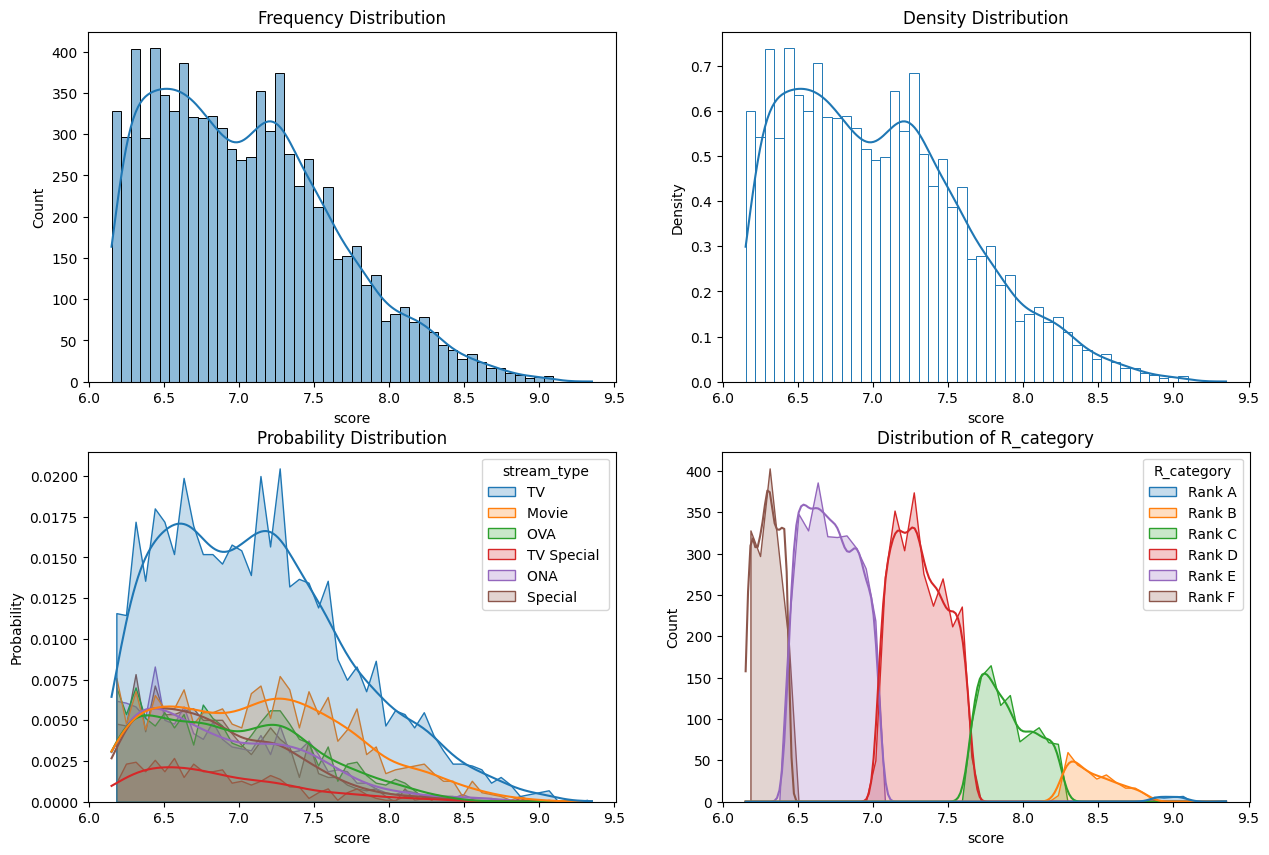

In [30]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
sns.histplot(data=df1, x='score', kde=True, bins=50, stat='count', ax=axes[0,0]).set_title("Frequency Distribution")
sns.histplot(data=df1, x='score', kde=True, bins=50, stat='density',fill=False, ax=axes[0,1]).set_title("Density Distribution")
sns.histplot(data=df1, x='score', kde=True, bins=50, stat='probability',hue='stream_type', element='poly', ax=axes[1,0]).set_title("Probability Distribution")
sns.histplot(data=df1, x='score', kde=True, bins=50, stat='count', hue='R_category', element='poly', ax=axes[1,1]).set_title("Distribution of R_category")

<Axes: xlabel='members', ylabel='score'>

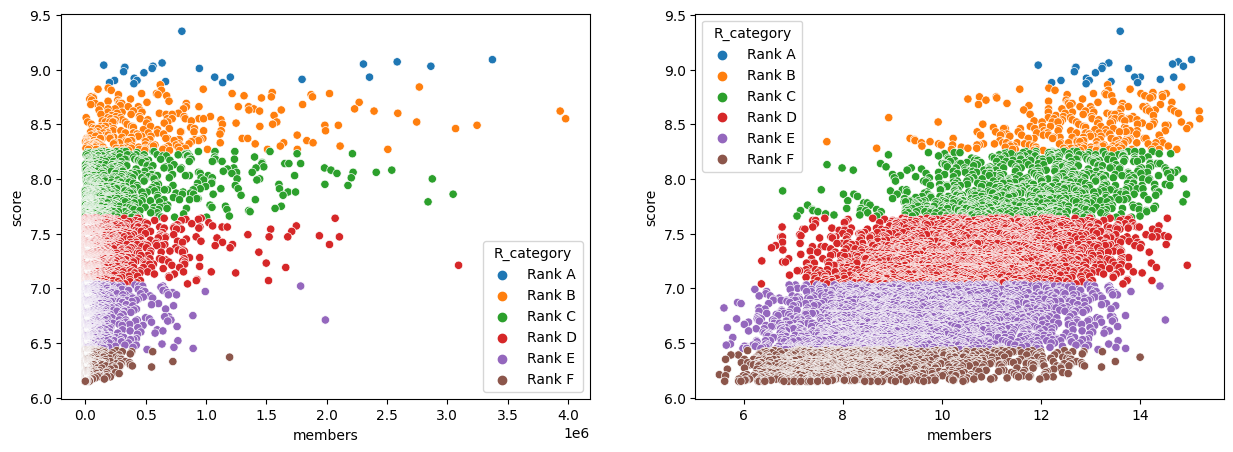

In [31]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
sns.scatterplot(data=df1, x='members', y='score',hue='R_category', ax=ax1)
sns.scatterplot(data=df1, x=np.log(df1['members']), y='score',hue='R_category', ax=ax2)

<Axes: xlabel='episodes', ylabel='members'>

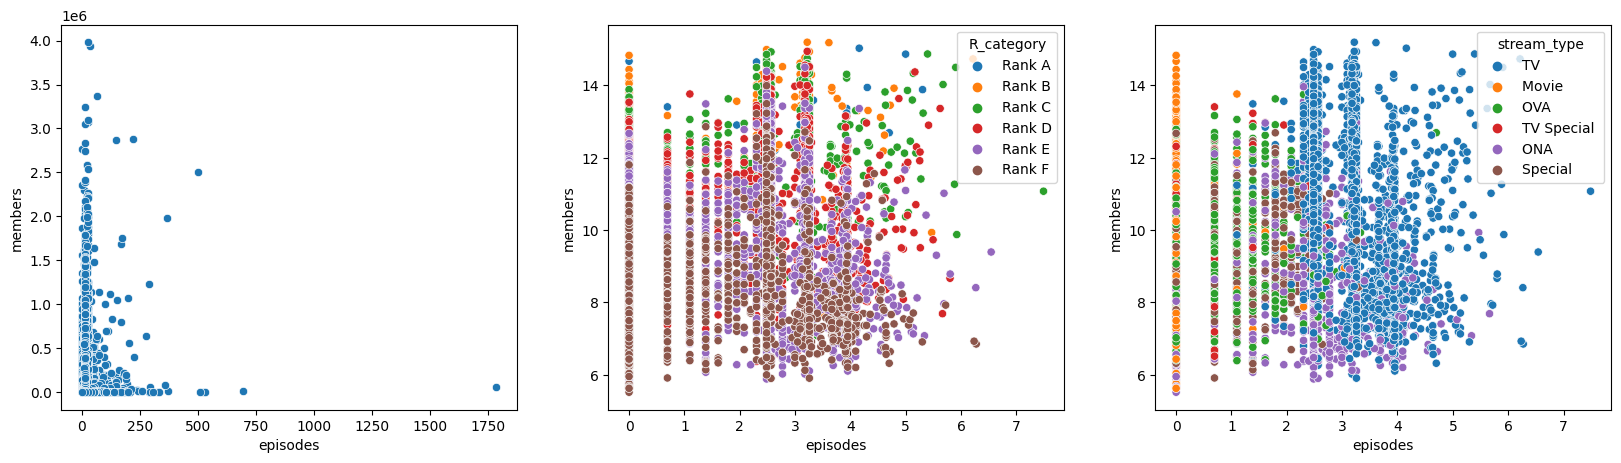

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
sns.scatterplot(data=df1, x='episodes', y='members', ax=ax1)
sns.scatterplot(data=df1, x=np.log(df1['episodes']), y=np.log(df1['members']), hue='R_category', ax=ax2)
sns.scatterplot(data=df1, x=np.log(df1['episodes']), y=np.log(df1['members']), hue='stream_type', ax=ax3)


In [33]:
df1[df1.episodes > 250]

,title,rank,stream_type,episodes,start_date,end_date,members,score,R_category
302,Naruto: Shippuuden,303,TV,500,2007-02-01,2017-03-01,2507333,8.27,Rank B
404,Dragon Ball Z,405,TV,291,1989-04-01,1996-01-01,1235957,8.18,Rank C
697,Bleach,698,TV,366,2004-10-01,2012-03-01,1985899,7.95,Rank C
919,Doraemon (1979),920,TV,1787,1979-04-01,2005-03-01,64534,7.83,Rank C
1069,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,1070,TV,373,1996-06-01,2004-12-01,19449,7.77,Rank C
1235,Keroro Gunsou,1236,TV,358,2004-04-01,2011-04-01,78275,7.70,Rank C
2311,Pokemon,2312,TV,276,1997-04-01,2002-11-01,636450,7.39,Rank D
2377,Atashin'chi,2378,TV,330,2002-04-01,2009-09-01,5805,7.37,Rank D
4050,Wan Jie Xian Zong 5th Season,4051,ONA,288,2021-06-01,2024-07-01,2178,7.04,Rank D
4205,Tottoko Hamtarou,4206,TV,296,2000-07-01,2006-03-01,60972,7.00,Rank E


<Axes: xlabel='episodes', ylabel='score'>

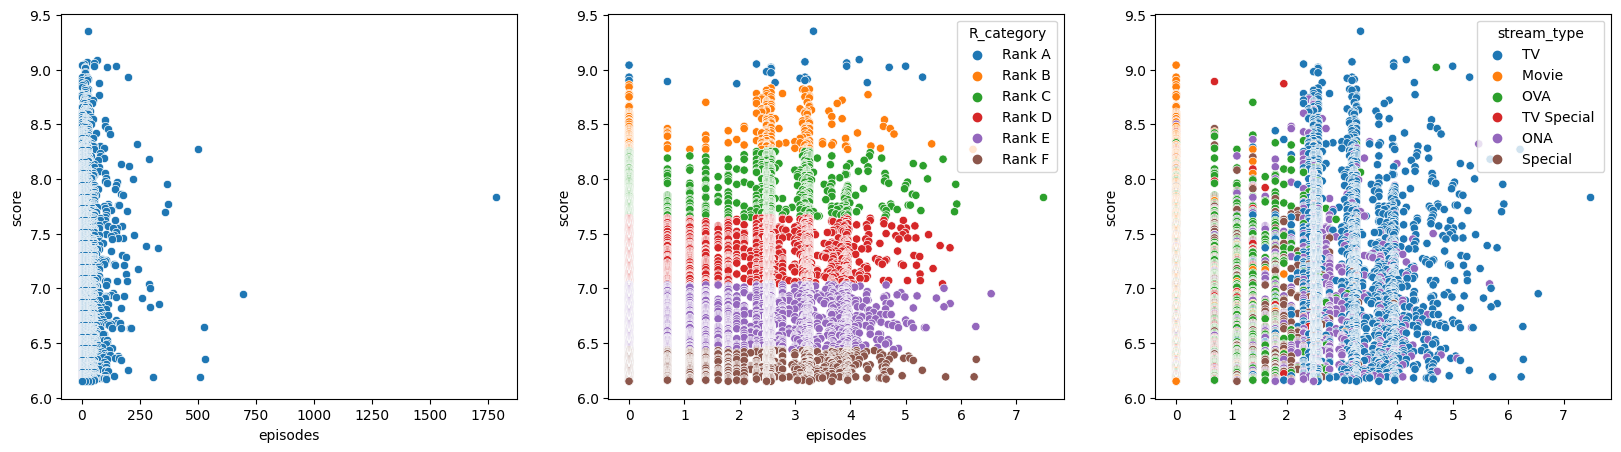

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))
sns.scatterplot(data=df1, x='episodes', y='score', ax=ax1)
sns.scatterplot(data=df1, x=np.log(df1['episodes']), y='score', hue='R_category', ax=ax2)
sns.scatterplot(data=df1, x=np.log(df1['episodes']), y='score', hue='stream_type', ax=ax3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='end_date', ylabel='members'>

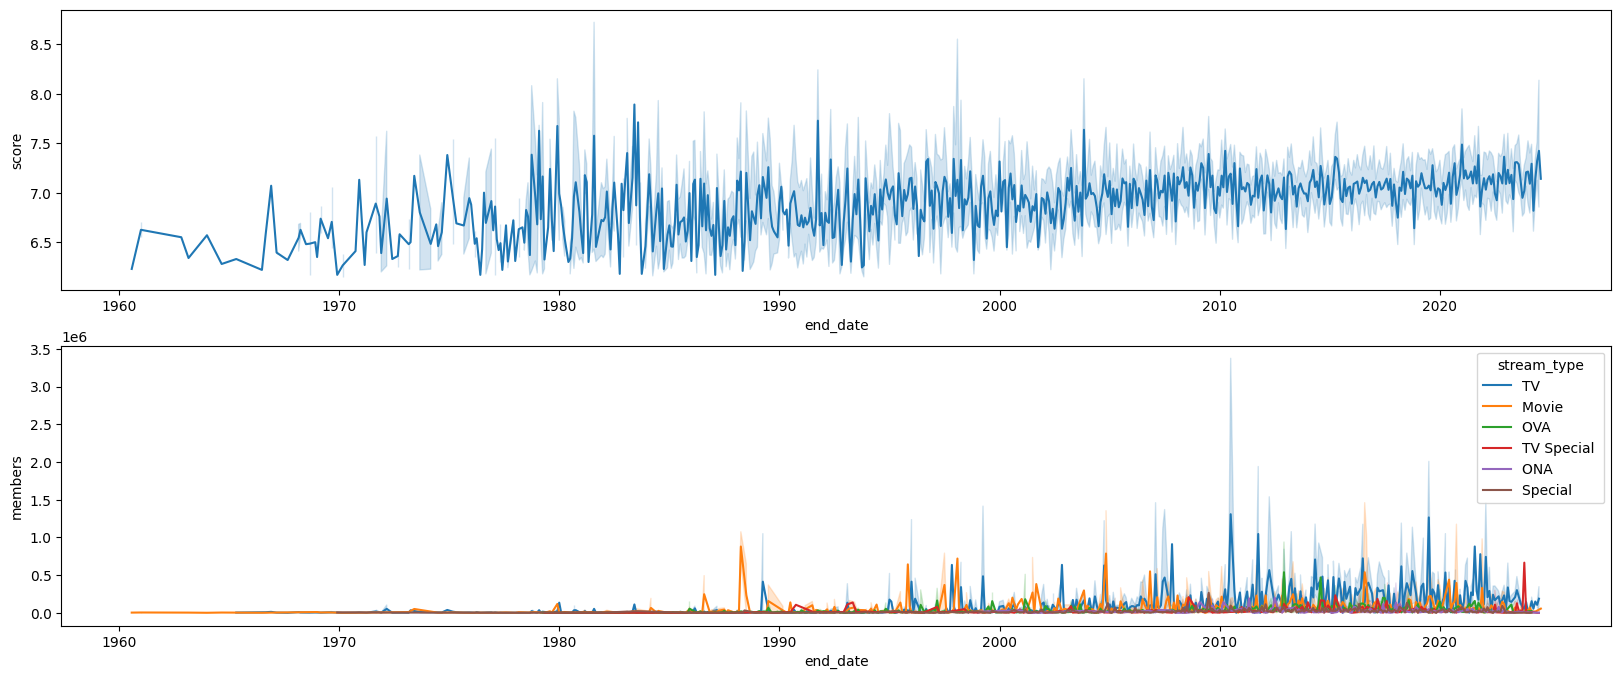

In [35]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(20,8))
sns.lineplot(data= df1, x='end_date', y='score', ax=ax1)
sns.lineplot(data= df1, x='end_date', y='members', hue='stream_type', ax=ax2)

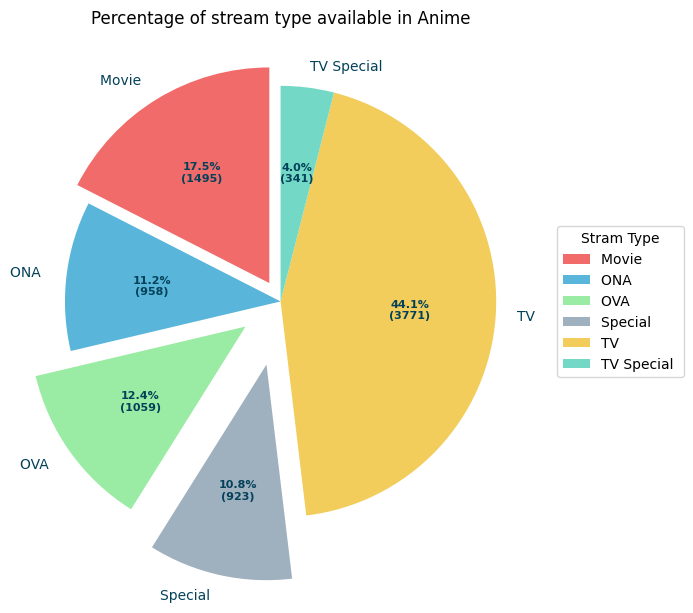

In [36]:
sum_stream_type = df1.groupby(df1['stream_type']).size()

# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)

# Creating color parameters
colors = ("#F26B6B", "#59B5D9", "#9AEBA3",
          "#9FB0BF", "#F2CD5C", "#73D9C6")
# Wedge properties
wp = {'linewidth': 0, 'edgecolor': "green"}
# Creating autocpt arguments
 
 
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(sum_stream_type,
                                  autopct=lambda pct: func(pct, sum_stream_type),
                                  explode=explode,
                                  labels=sum_stream_type.index,
                                  shadow=False,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  textprops=dict(color="#034159"))
# Adding legend
ax.legend(wedges, sum_stream_type.index,
          title="Stram Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Percentage of stream type available in Anime")

#fig = plt.figure(figsize=(10, 7))
#plt.pie(sum_stream_type, labels=sum_stream_type.index)
plt.show()

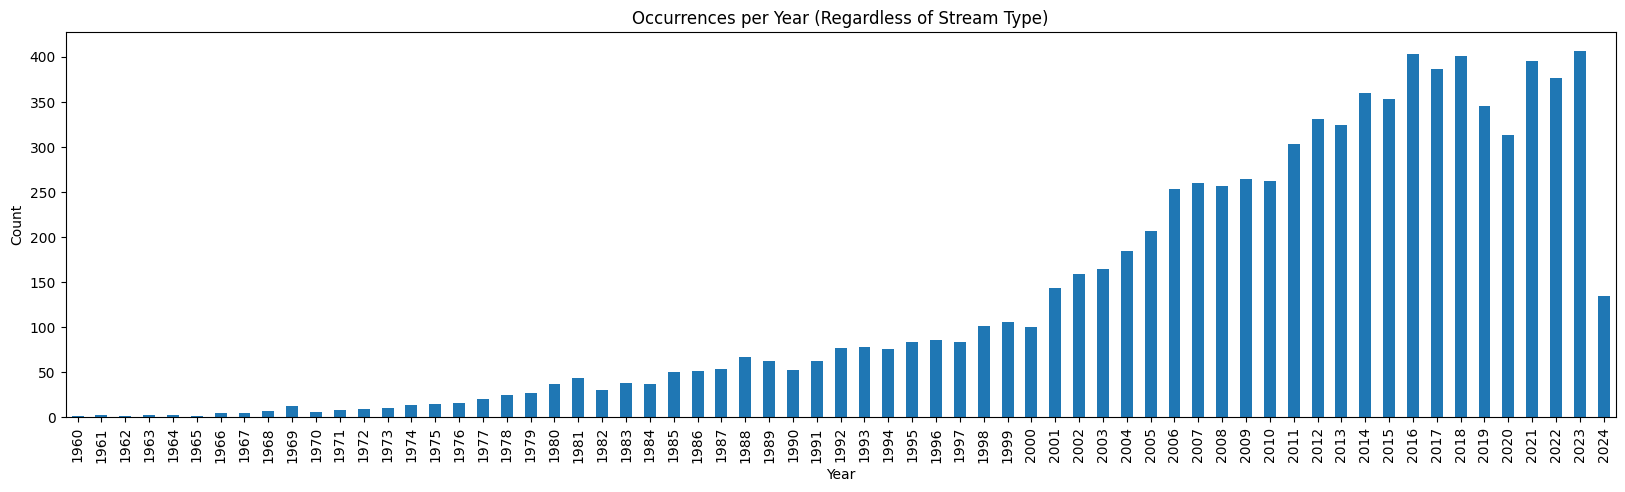

In [37]:
#yearly_counts = df.groupby(df['Date'].dt.year).size()
yearly_counts = df1.groupby(df1['start_date'].dt.year).size()
fig=plt.subplots(figsize=(20,5))
yearly_counts.plot(kind='bar', xlabel='Year', ylabel='Count', title='Occurrences per Year (Regardless of Stream Type)')
plt.show()

In [38]:
# df['Week/Year'] = df['Timestamp'].apply(lambda x: f"{x.week}/{x.year}")
# result = df.groupby(['Week/Year', 'Category']).size()
df1['Year'] = df1['start_date'].apply(lambda x: f"{x.year}")
anime_release_per_year = df1.groupby(['Year', 'stream_type']).size()
print(anime_release_per_year)

Year  stream_type
1960  Movie           1
1961  Movie           2
1962  Movie           1
1963  Movie           1
      TV              2
                     ..
2024  ONA            27
      OVA             1
      Special         1
      TV             83
      TV Special      7
Length: 280, dtype: int64


**From 2014 to 2024 how many anime has been relsease for each stream type?**

In [39]:
df1['Year'] = (df1['Year']).astype('int64')
df1

,title,rank,stream_type,episodes,start_date,end_date,members,score,R_category,Year
0,Sousou no Frieren,1,TV,28,2023-09-01,2024-03-01,800615,9.35,Rank A,2023
1,Fullmetal Alchemist: Brotherhood,2,TV,64,2009-04-01,2010-07-01,3373923,9.09,Rank A,2009
2,Steins;Gate,3,TV,24,2011-04-01,2011-09-01,2584616,9.07,Rank A,2011
3,Gintama°,4,TV,51,2015-04-01,2016-03-01,636631,9.06,Rank A,2015
4,Shingeki no Kyojin Season 3 Part 2,5,TV,10,2019-04-01,2019-07-01,2305044,9.05,Rank A,2019
...,...,...,...,...,...,...,...,...,...,...
8645,Hypersonic Music Club,8646,ONA,1,2023-08-01,2023-08-01,383,6.15,Rank F,2023
8646,Iron Man: Rise of Technovore,8647,OVA,1,2013-04-01,2013-04-01,8616,6.15,Rank F,2013
8647,Jewelpet Movie: Sweets Dance Princess,8648,Movie,1,2012-08-01,2012-08-01,1797,6.15,Rank F,2012
8648,Si Hai Jing Qi,8649,ONA,12,2018-08-01,2018-11-01,911,6.15,Rank F,2018


In [40]:
f1960s = df1.loc[(df1['Year']>=1960) & (df1['Year']<=1969)]
f1960s

,title,rank,stream_type,episodes,start_date,end_date,members,score,R_category,Year
2925,Tiger Mask,2926,TV,105,1969-10-01,1971-09-01,11139,7.26,Rank D,1969
2991,Dororo to Hyakkimaru,2992,TV,26,1969-04-01,1969-09-01,22278,7.25,Rank D,1969
3592,Muumin,3593,TV,65,1969-10-01,1970-12-01,7170,7.13,Rank D,1969
3904,Tetsuwan Atom,3905,TV,193,1963-01-01,1966-12-01,13489,7.07,Rank D,1963
4504,Kyojin no Hoshi,4505,TV,182,1968-03-01,1971-09-01,3371,6.93,Rank E,1968
4586,Nagagutsu wo Haita Neko,4587,Movie,1,1969-03-01,1969-03-01,4989,6.91,Rank E,1969
5124,Cyborg 009 (TV),5125,TV,26,1968-04-01,1968-09-01,7027,6.80,Rank E,1968
5333,Attack No.1,5334,TV,104,1969-12-01,1971-11-01,10190,6.76,Rank E,1969
5372,Gegege no Kitarou (1968),5373,TV,65,1968-01-01,1969-03-01,5411,6.75,Rank E,1968
5416,Sasuke,5417,TV,29,1968-09-01,1969-03-01,2579,6.75,Rank E,1968


In [41]:
f1960s = df1.loc[(df1['Year']>=1960) & (df1['Year']<=1969)]
f1970s = df1.loc[(df1['Year']>=1970) & (df1['Year']<=1979)]
f1980s = df1.loc[(df1['Year']>=1980) & (df1['Year']<=1989)]
f1990s = df1.loc[(df1['Year']>=1990) & (df1['Year']<=1999)]
f2000s = df1.loc[(df1['Year']>=2000) & (df1['Year']<=2009)]
f2010s = df1.loc[(df1['Year']>=2010) & (df1['Year']<=2019)]
f2020s = df1.loc[(df1['Year']>=2020) & (df1['Year']<=2029)]
decades_count = [f1960s.shape[0], f1970s.shape[0], f1980s.shape[0], f1990s.shape[0], f2000s.shape[0], f2010s.shape[0], f2020s.shape[0]]
print("Anime released in 1960s:", f1960s.shape[0])
print("Anime released in 1970s:", f1970s.shape[0])
print("Anime released in 1980s:", f1980s.shape[0])
print("Anime released in 1990s:", f1990s.shape[0])
print("Anime released in 2000s:", f2000s.shape[0])
print("Anime released in 2010s:", f2010s.shape[0])
print("Anime released in 2020s:", f2020s.shape[0])

Anime released in 1960s: 39
Anime released in 1970s: 150
Anime released in 1980s: 470
Anime released in 1990s: 804
Anime released in 2000s: 1991
Anime released in 2010s: 3469
Anime released in 2020s: 1626


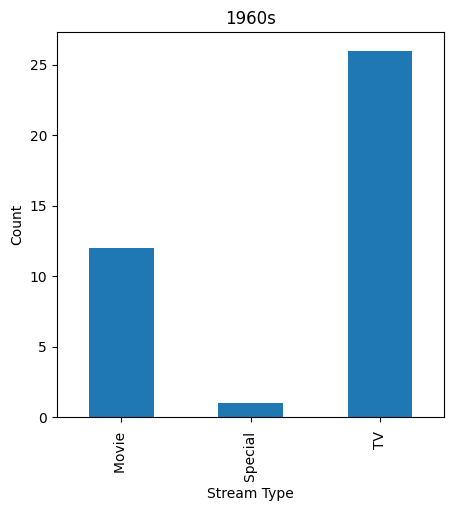

In [42]:
e1960s = f1960s.groupby(['stream_type']).size()
e1970s = f1970s.groupby(['stream_type']).size()
e1980s = f1980s.groupby(['stream_type']).size()
e1990s = f1990s.groupby(['stream_type']).size()
e2000s = f2000s.groupby(['stream_type']).size()
e2010s = f2010s.groupby(['stream_type']).size()
e2020s = f2020s.groupby(['stream_type']).size()
fig = plt.subplots(figsize=(5,5))
e1960s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='1960s')
plt.show()

<Axes: title={'center': '1970s'}, xlabel='Stream Type', ylabel='Count'>

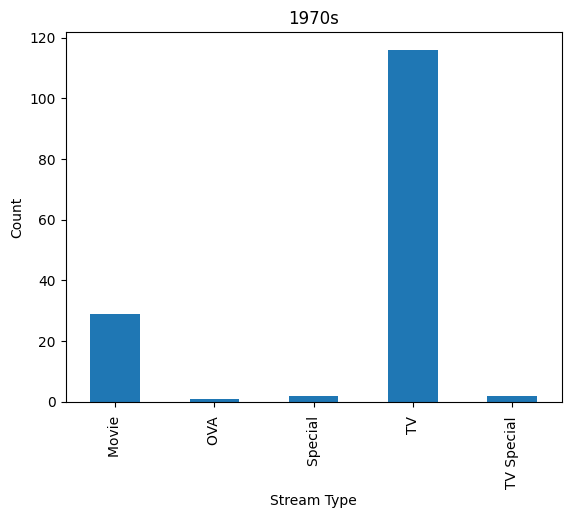

In [43]:
e1970s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='1970s')

<Axes: title={'center': '1980s'}, xlabel='Stream Type', ylabel='Count'>

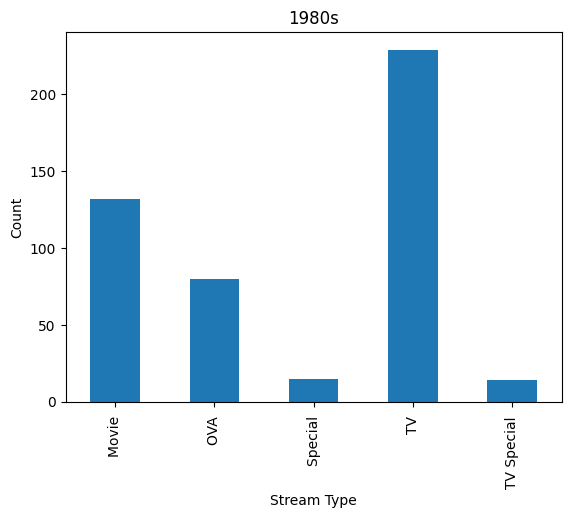

In [44]:
e1980s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='1980s')

<Axes: title={'center': '1990s'}, xlabel='Stream Type', ylabel='Count'>

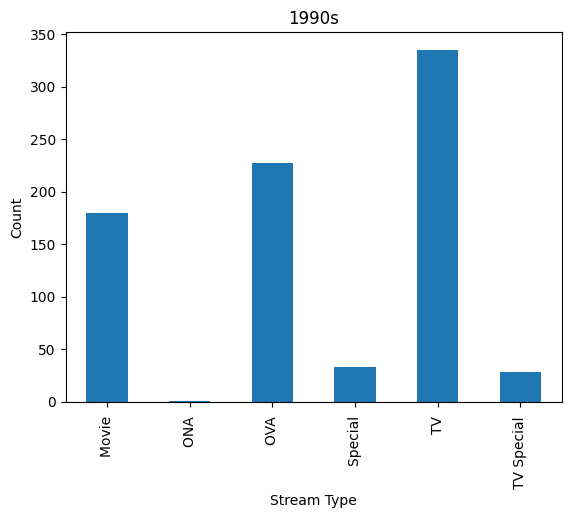

In [45]:
e1990s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='1990s')

<Axes: title={'center': '2000s'}, xlabel='Stream Type', ylabel='Count'>

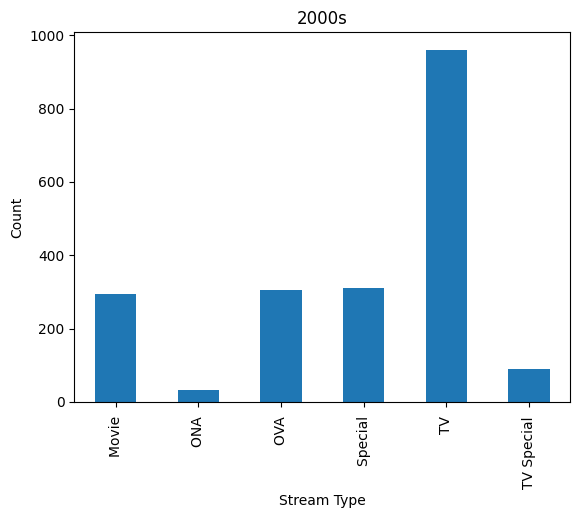

In [46]:
e2000s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='2000s')

<Axes: title={'center': '2010s'}, xlabel='Stream Type', ylabel='Count'>

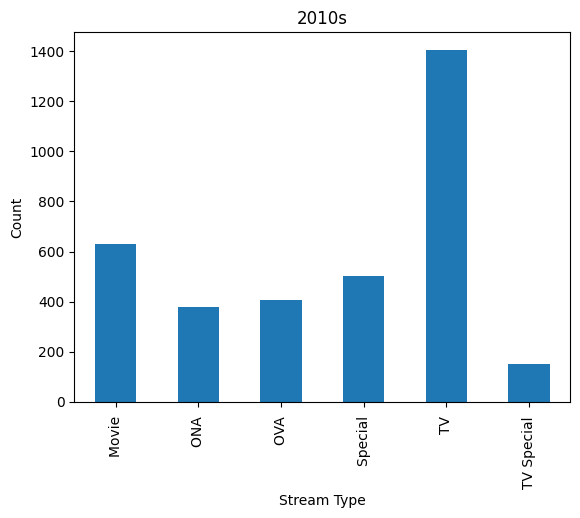

In [47]:
e2010s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='2010s')

<Axes: title={'center': '2020s'}, xlabel='Stream Type', ylabel='Count'>

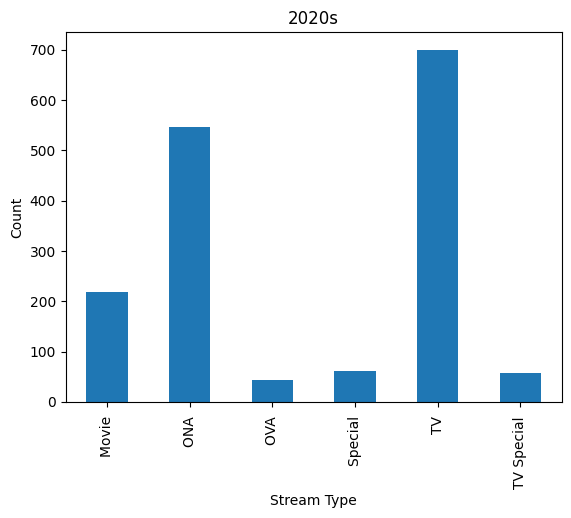

In [48]:
e2020s.plot(kind='bar',stacked=True, xlabel='Stream Type', ylabel='Count', title='2020s')